Transformasi Twirl

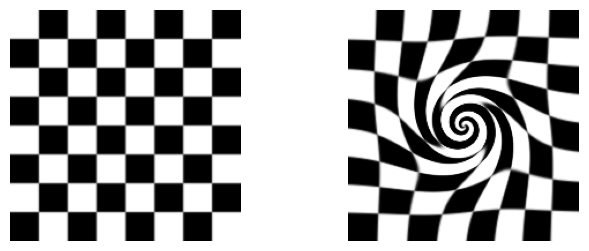

In [19]:
import matplotlib.pyplot as plt
from skimage import data
from skimage.transform import swirl

image = data.checkerboard()
swirled = swirl(image, rotation=0, strength=10, radius=120)

fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(8, 3), sharex=True, sharey=True)
ax0.imshow(image, cmap=plt.cm.gray)
ax0.axis('off')
ax1.imshow(swirled, cmap=plt.cm.gray)
ax1.axis('off')

plt.show()


Translation 

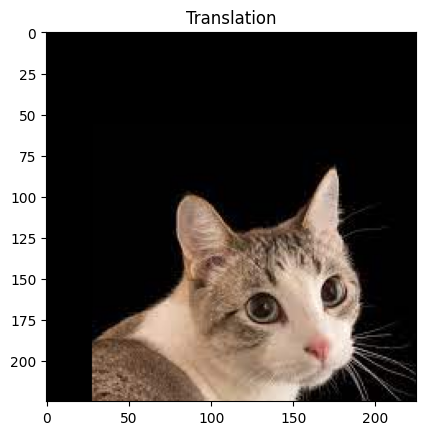

In [20]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

image = cv.imread("cat.jpg")
h, w = image.shape[:2]
half_height, half_width = h // 4, w // 8
transition_matrix = np.float32([[1, 0, half_width],
                               [0, 1, half_height]])
img_transition = cv.warpAffine(image, transition_matrix, (w, h))

plt.imshow(cv.cvtColor(img_transition, cv.COLOR_BGR2RGB))
plt.title("Translation")
plt.show()


Rotation

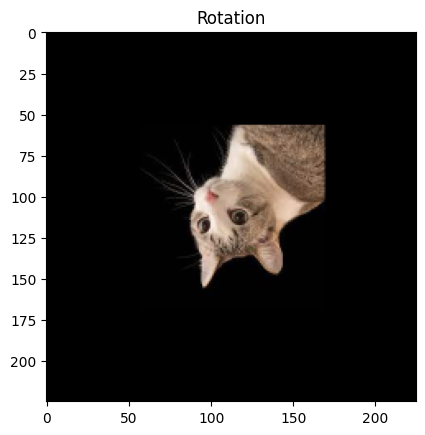

In [21]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

image = cv.imread("cat.jpg")
h, w = image.shape[:2]

rotation_matrix = cv.getRotationMatrix2D((w/2, h/2), -180, 0.5)
rotated_image = cv.warpAffine(image, rotation_matrix, (w, h))

plt.imshow(cv.cvtColor(rotated_image, cv.COLOR_BGR2RGB))
plt.title("Rotation")
plt.show()


Interpolation

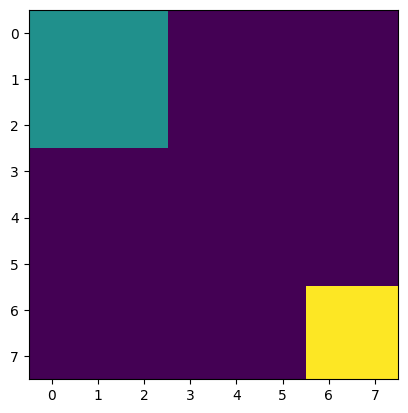

In [22]:
import mahotas as mh
import numpy as np
import matplotlib.pyplot as plt

regions = np.zeros((8, 8), bool)
regions[:3, :3] = 1
regions[6:, 6:] = 1

labeled, nr_objects = mh.label(regions)

plt.imshow(labeled, interpolation='nearest')
plt.show()

Skala Interpolasi Miring

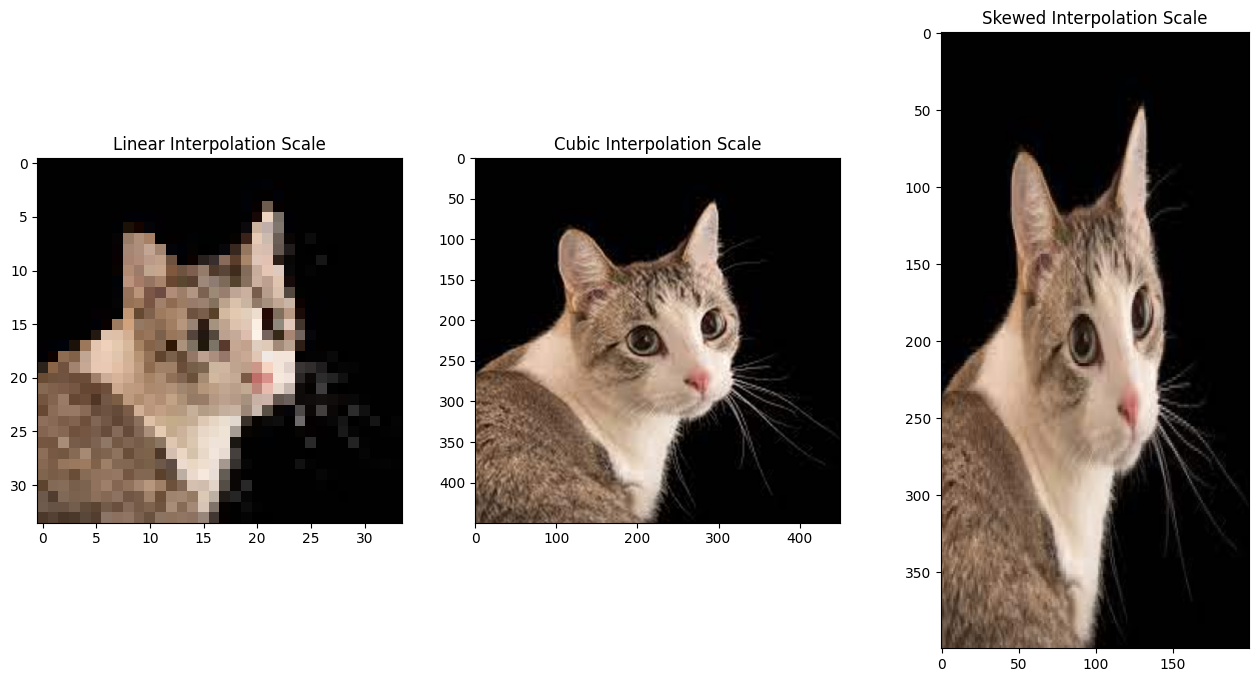

In [23]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

image = cv.imread("cat.jpg")

fig, ax = plt.subplots(1, 3, figsize=(16, 8))

image_scaled = cv.resize(image, None, fx=0.15, fy=0.15)
ax[0].imshow(cv.cvtColor(image_scaled, cv.COLOR_BGR2RGB))
ax[0].set_title("Linear Interpolation Scale")

image_scaled_2 = cv.resize(image, None, fx=2, fy=2, interpolation=cv.INTER_CUBIC)
ax[1].imshow(cv.cvtColor(image_scaled_2, cv.COLOR_BGR2RGB))
ax[1].set_title("Cubic Interpolation Scale")

image_scaled_3 = cv.resize(image, (200, 400), interpolation=cv.INTER_AREA)
ax[2].imshow(cv.cvtColor(image_scaled_3, cv.COLOR_BGR2RGB))
ax[2].set_title("Skewed Interpolation Scale")

plt.show()
